In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2230, '18 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['median'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.000000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.011050
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.006650
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.000050
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.004750
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


<IPython.core.display.Javascript object>


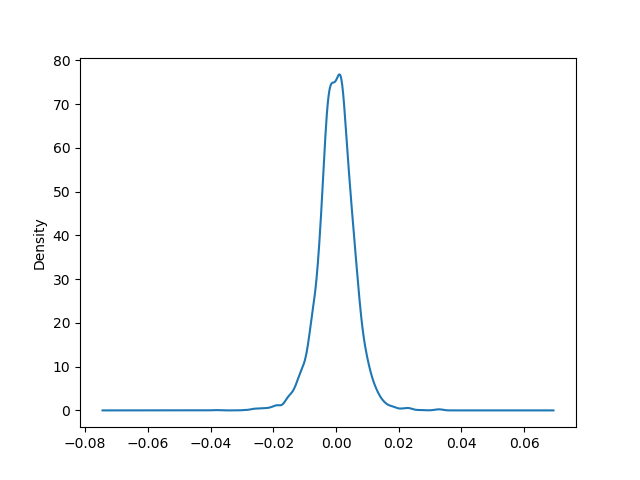

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.000000,0.011050,0.006650,0.000050,-0.004750
1,0.011050,0.006650,0.000050,-0.004750,-0.003800
2,0.006650,0.000050,-0.004750,-0.003800,0.003550
3,0.000050,-0.004750,-0.003800,0.003550,0.002200
4,-0.004750,-0.003800,0.003550,0.002200,-0.003900
...,...,...,...,...,...
5162,-0.002785,-0.000625,-0.000920,-0.001275,0.000040
5163,-0.000625,-0.000920,-0.001275,0.000040,0.002745
5164,-0.000920,-0.001275,0.000040,0.002745,0.003320
5165,-0.001275,0.000040,0.002745,0.003320,0.000430


In [9]:
from Bayesian import *

In [10]:
x=wn['d1']
y=wn['d2']
data = np.array([x, y])

robust_model = analyze_standard(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(500, tune=250, step=step, random_seed=21412, progressbar=False)

print(pm.summary(robust_trace))


rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


cov __str__ = [[ 1.000000e-08 -2.144021e-08]
 [-2.144021e-08  1.000000e-06]]


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [r]
>Metropolis: [sigma]


sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021


C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.5678336920830948
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.5678336920830948
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.6428872835075771


sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7171483009312765
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7727589893373881
sigma __str__ = [0.0001 0

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.8000864148850602
sigma __str__ = [0.0001 0.001 ]


sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7790849857610711
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.0001 0.001 ]
r

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
sigma __str__ = [0.0001 0.001 ]
rh

sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rh

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
sigma __str__ = [0.0001 0.001 ]
rh

rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755


sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
sigma __str__ = [0.00056824 0.00180559]
rho 

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
sigma __str__ = [0.00056824 0.00180559

The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
sigma __str__ = [0.0001 0.001 ]
rho __str__ = -0.2144021
                  mean            sd      mc_error       hpd_2.5  \
sigma__0  6.580740e-04  4.187684e-04  4.184951e-05  1.000000e-04   
sigma__1  1.393969e-03  3.050549e-04  3.039923e-05  1.000000e-03   
r         4.139405e-01  2.641990e-01  2.637650e-02  1.485858e-01   
cov__0_0  6.084284e-07  5.108316e-07  5.106122e-08  1.000000e-08   
cov__0_1  2.453504e-07  1.306862e-07  1.290195e-08  7.830194e-08   
cov__1_0  2.453504e-07  1.306862e-07  1.290195e-08  7.830194e-08   
cov__1_1  2.036208e-06  8.430205e-07  8.399589e-08  1.000000e-06   

              hpd_97.5     n_eff      Rhat  
sigma__0  1.133022e-03  1.149748  3.257892  
sigma__1  1.805586e-03  5.050297  1.088943  
r         7.830194e-01  1.231143  2.710386  
cov__0_0  1.283738e-06  1.094598  4.016883  
cov__0_1  4.200825e-07  5.336120  1.074351

C:\Users\rando\Anaconda3\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417926
cov __str__ = [[1.28373799e-06 2.62355679e-07]
 [2.62355679e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417926
cov __str__ = [[1.28373799e-06 2.62355679e-07]
 [2.62355679e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417926
cov __str__ = [[1.28373799e-06 2.62355679e-07]
 [2.62355679e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417926
cov __str__ = [[1.28373799e-06 2.62355679e-07]
 [2.62355679e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417926
cov __str__ = [[1.28373799e-06 2.62355679e-07]
 [2.62355679e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417926
cov __str__ = [[1.28373799e-06 2.62355679e-07]
 [2.62355679e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.17145804552417

sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685

sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685

sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.15319829382685715
cov __str__ = [[8.94983974e-07 2.34106321e-07]
 [2.34106321e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.15319829382685715
cov __str__ = [[8.94983974e-07 2.34106321e-07]
 [2.34106321e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019

rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.

rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-07]
 [4.11462670e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-07]
 [4.11462670e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-07]
 [4.11462670e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-07]
 [4.11462670e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-07]
 [4.11462670e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-07]
 [4.11462670e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.4010361178299475
cov __str__ = [[3.22892154e-07 4.11462670e-

sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500

sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500

cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.14858577787129282
cov __str__ = [[1.28373799e-06 2.27357792e-07]
 [2.27357792e-07 1.8238

cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.8238

rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.344

sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00113302 0.0013505 ]
rho __str__ = 0.15319829382685715
cov __str__ = [[1.28373799e-06 2.34415610e-07]
 [2.34415610e-07 1.82384870e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.15319829382685715
cov __str__ = [[8.94983974e-07 2.34106321e-07]
 [2.34106321e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.15319829382685715
cov __str__ = [[8.94983974e-07 2.34106321e-07]
 [2.34106321e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003755
cov __str__ = [[8.94983974e-07 3.26083842e-07]
 [3.26083842e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21338803687003

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039

sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039884
cov __str__ = [[8.94983974e-07 3.29297101e-07]
 [3.29297101e-07 2.60917473e-06]]
sigma __str__ = [0.00094604 0.00161529]
rho __str__ = 0.21549078130039

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.

cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.7

sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.0001 0.001 ]
rho __str__ = 0.783019370782623
cov __str__ = [[1.00000000e-08 7.83019371e-08]
 [7.83019371e-08 1.00000000e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.783019370782623
cov __str__ = [[3.22892154e-07 8.03377118e-07]
 [8.03377118e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.7461284279807038
cov __str__ = [[3.22892154e-07 7.65527047e-07]
 [

sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500

sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500547
cov __str__ = [[3.22892154e-07 4.20082505e-07]
 [4.20082505e-07 3.26014121e-06]]
sigma __str__ = [0.00056824 0.00180559]
rho __str__ = 0.40943752502500

<IPython.core.display.Javascript object>


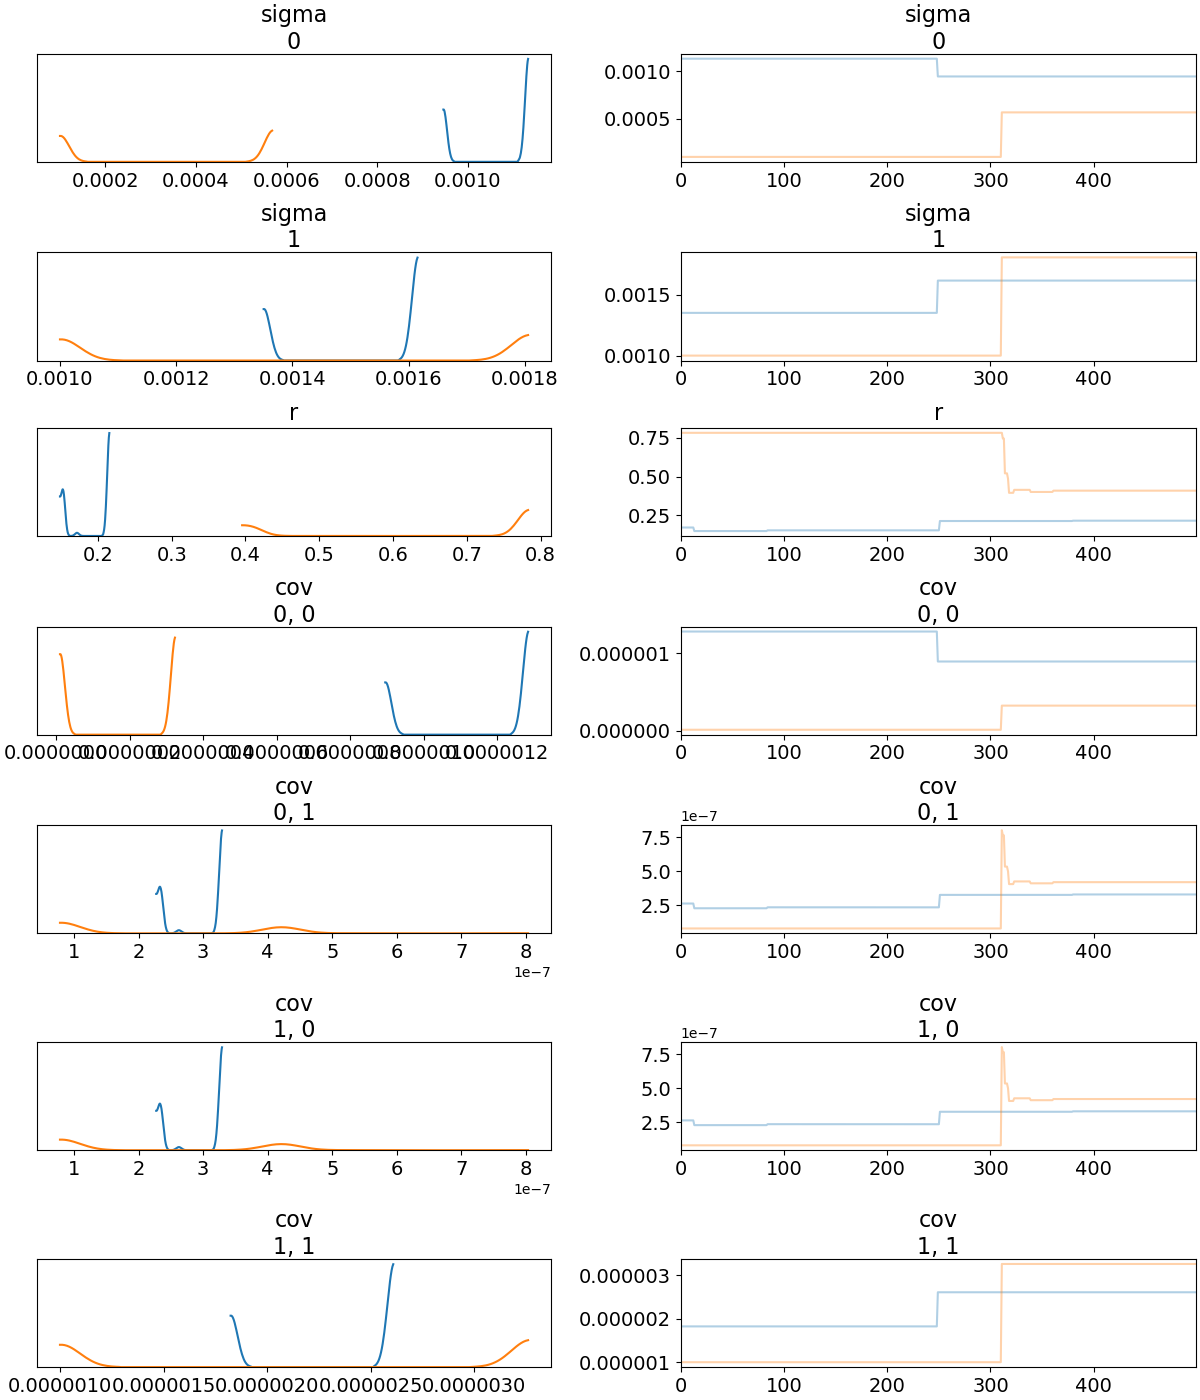

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284D661BAC8>,
      dtype=object)

In [11]:
pm.traceplot(robust_trace)

<IPython.core.display.Javascript object>


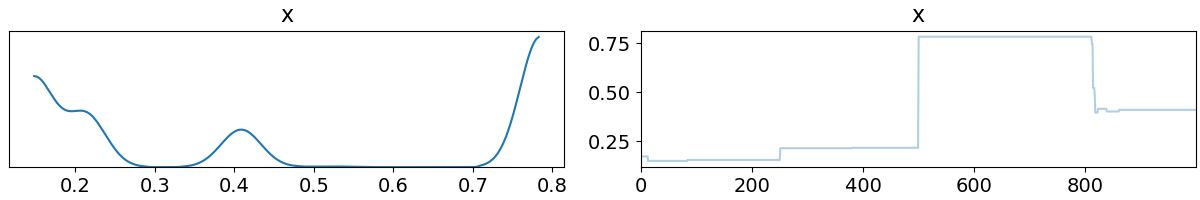

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284D7791C08>,
      dtype=object)

In [12]:
pm.traceplot(robust_trace['r'])

<IPython.core.display.Javascript object>


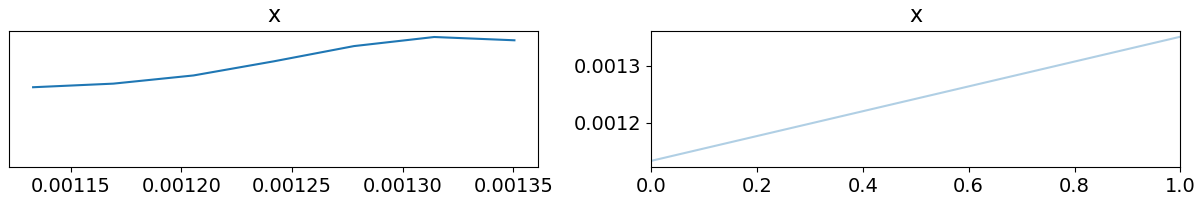

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284D88DD988>,
      dtype=object)

In [18]:
pm.traceplot(robust_trace['sigma'][0])